In [1]:
#Import Dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#Read CSV File, Converting to DF
person_df = pd.read_csv('./person.CSV')

In [2]:
#Clean The Data To Only Include The Driver of A Motor Vehicle
person_df = person_df[person_df['PER_TYP'] == 1]
person_df

,CASENUM,VE_FORMS,VEH_NO,PER_NO,REGION,PSU,PJ,PSU_VAR,URBANICITY,STRATUM,...,P_SF3,LOCATION,SEX_IM,INJSEV_IM,EJECT_IM,PERALCH_IM,SEAT_IM,AGE_IM,PSUSTRAT,WEIGHT
0,201800381338,4,1,1,4,56,208,208,1,9,...,0,0,1,0,0,0,11,48,20,187.193308
1,201800381338,4,2,1,4,56,208,208,1,9,...,0,0,2,0,0,0,11,43,20,187.193308
2,201800381338,4,3,1,4,56,208,208,1,9,...,0,0,1,0,0,0,11,37,20,187.193308
3,201800381338,4,4,1,4,56,208,208,1,9,...,0,0,1,0,0,0,11,67,20,187.193308
4,201800381366,3,1,1,4,56,214,214,1,7,...,0,0,2,1,0,0,11,32,20,149.787336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120225,201801402628,2,1,1,4,60,257,60,1,6,...,0,0,2,1,0,0,11,27,21,82.623031
120226,201801402628,2,2,1,4,60,257,60,1,6,...,0,0,2,1,0,0,11,23,21,82.623031
120227,201801402629,2,1,1,4,60,257,60,1,4,...,0,0,1,1,0,0,11,66,21,16.071732
120228,201801402629,2,2,1,4,60,257,60,1,4,...,0,0,1,3,0,0,11,57,21,16.071732


# Bar Chart - Injury Severity Associations

In [4]:
##Age and Sex

#Copy Neccessary Columns to New DF
personCl = person_df[['AGE_IM', 'SEX_IM', 'INJSEV_IM']].copy()
personCl


,AGE_IM,SEX_IM,INJSEV_IM
0,48,1,0
1,43,2,0
2,37,1,0
3,67,1,0
4,32,2,1
...,...,...,...
120225,27,2,1
120226,23,2,1
120227,66,1,1
120228,57,1,3


In [5]:
##Create Group and Calculate Totals for Each Group

#Array to Hold Age Group Labels
xlabels = ['<18', '19-29', '30-39', '40-49', '50+']

#Separate Arrays to Store Male and Female Data Based on Age Group
gr1M = []
gr1F = []
gr2M = []
gr2F = []
gr3M = []
gr3F = []
gr4M = []
gr4F = []
gr5M = []
gr5F = []

#Loop Through the 7 Possible INJSEV_IM Code Numbers
for x in range(7):
    
    #Count Amount of Times Each INJSEV_IM Code Appears In CSV Based on Age and Sex
    ageGr1M = len(personCl.loc[(personCl['AGE_IM'] <= 18) & (personCl['SEX_IM'] == 1) & (personCl['INJSEV_IM'] == x)])
    ageGr1F = len(personCl.loc[(personCl['AGE_IM'] <= 18) & (personCl['SEX_IM'] == 2) & (personCl['INJSEV_IM'] == x)])
    ageGr2M = len(personCl.loc[(personCl['AGE_IM'] < 30) &(personCl['AGE_IM'] >= 19) & (personCl['SEX_IM'] == 1) & (personCl['INJSEV_IM'] == x)])
    ageGr2F = len(personCl.loc[(personCl['AGE_IM'] < 30) &(personCl['AGE_IM'] >= 19) & (personCl['SEX_IM'] == 2) & (personCl['INJSEV_IM'] == x)])
    ageGr3M = len(personCl.loc[(personCl['AGE_IM'] < 40) &(personCl['AGE_IM'] >= 30) & (personCl['SEX_IM'] == 1) & (personCl['INJSEV_IM'] == x)])
    ageGr3F = len(personCl.loc[(personCl['AGE_IM'] < 40) &(personCl['AGE_IM'] >= 30) & (personCl['SEX_IM'] == 2) & (personCl['INJSEV_IM'] == x)])
    ageGr4M = len(personCl.loc[(personCl['AGE_IM'] < 50) &(personCl['AGE_IM'] >= 40) & (personCl['SEX_IM'] == 1) & (personCl['INJSEV_IM'] == x)])
    ageGr4F = len(personCl.loc[(personCl['AGE_IM'] < 50) &(personCl['AGE_IM'] >= 40) & (personCl['SEX_IM'] == 2) & (personCl['INJSEV_IM'] == x)])
    ageGr5M = len(personCl.loc[(personCl['AGE_IM'] >= 50) & (personCl['SEX_IM'] == 1) & (personCl['INJSEV_IM'] == x)])
    ageGr5F = len(personCl.loc[(personCl['AGE_IM'] >= 50) & (personCl['SEX_IM'] == 2) & (personCl['INJSEV_IM'] == x)])
    
    #Add Each Value to Corresponding Age Group Array
    gr1M.append(ageGr1M)
    gr1F.append(ageGr1F)
    gr2M.append(ageGr2M)
    gr2F.append(ageGr2F)
    gr3M.append(ageGr3M)
    gr3F.append(ageGr3F)
    gr4M.append(ageGr4M)
    gr4F.append(ageGr4F)
    gr5M.append(ageGr5M)
    gr5F.append(ageGr5F)
    
#Construct Male DF Using Data From Corresponding Array
maleDf = pd.DataFrame({'<18': gr1M,
                          '19-29': gr2M,
                          '30-39': gr3M,
                          '40-49': gr4M,
                          '50+': gr5M})

#Construct Male DF Using Data From Corresponding Array
femaleDf = pd.DataFrame({'<18': gr1F,
                          '19-29': gr2F,
                          '30-39': gr3F,
                          '40-49': gr4F,
                          '50+': gr5F})
print(maleDf)
print(femaleDf)

    <18  19-29  30-39  40-49    50+
0  2110   9870   7188   6200  11935
1   241   1487   1075    888   1804
2   154   1092    704    545   1141
3   111    701    534    375    778
4    18    126     91     70    175
5     4     30     21     23     45
6     0      0      1      0      3
    <18  19-29  30-39  40-49   50+
0  1752   7507   5157   4181  7323
1   287   1661   1178   1018  1810
2   136    780    474    406   769
3    77    473    302    280   539
4    16     38     30     20    59
5     2     31     25     16    29
6     0      0      0      0     0


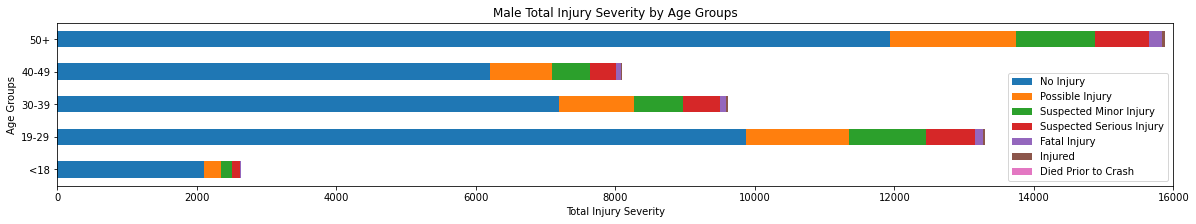

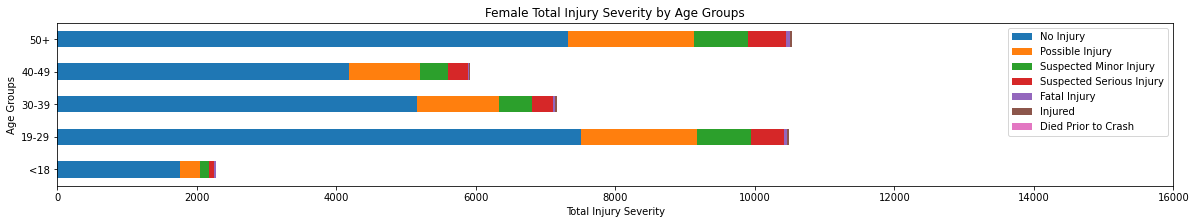

In [7]:
## Establish Graph Elements

#Set The Figure Size For Both Figures
plt.rcParams["figure.figsize"] = (20,3)

#Transpose and Convert DF to Horizontal Stacked Bar Graph with Title
malePlot = maleDf.T.plot.barh(stacked = True, title = 'Male Total Injury Severity by Age Groups')

#Set Figure Limits to Match Female
plt.xlim([0, 16000])

#Set Axis Labels
plt.xlabel('Total Injury Severity')
plt.ylabel('Age Groups')

#Configure Legend for Male
malePlot.legend(['No Injury', 'Possible Injury', 'Suspected Minor Injury', 'Suspected Serious Injury', 'Fatal Injury', 'Injured', 'Died Prior to Crash'])

#Transpose and Convert DF to Horizontal Stacked Bar Graph with Title
femalePlot = femaleDf.T.plot.barh(stacked = True, title = 'Female Total Injury Severity by Age Groups')

#Set Figure Limits to Match Male
plt.xlim([0, 16000])

#Set Axis Labels
plt.xlabel('Total Injury Severity')
plt.ylabel('Age Groups')

#Configure Legend for Female
femalePlot.legend(['No Injury', 'Possible Injury', 'Suspected Minor Injury', 'Suspected Serious Injury', 'Fatal Injury', 'Injured', 'Died Prior to Crash'])